In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scaled) 
print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


In [12]:
plt.style.use('fivethirtyeight')

In [13]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

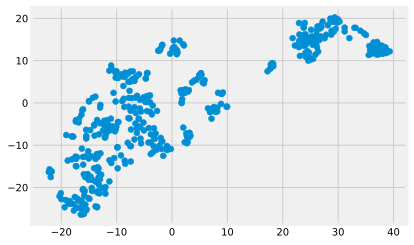

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

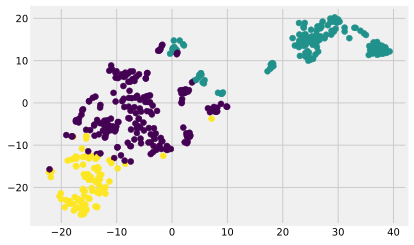

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [24]:
print('Средние значения price:')
print(f'Кластер 0: {y_train[labels_train == 0].mean()}')
print(f'Кластер 1: {y_train[labels_train == 1].mean()}') 
print(f'Кластер 2: {y_train[labels_train == 2].mean()}')
print('Средние значения CRIM:')
print(f'Кластер 0: {X_train.loc[labels_train == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_train.loc[labels_train == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_train.loc[labels_train == 2, "CRIM"].mean()}')

Средние значения price:
Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708663
Кластер 2: 27.78837209302326
Средние значения CRIM:
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


In [19]:
labels_test = kmeans.predict(X_test_scaled)

In [20]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean())) 
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: 21.860784313725492
Кластер 1: 16.43714285714286
Кластер 2: 31.35
Средние значения CRIM:
Кластер 0: 0.26607882352941176
Кластер 1: 10.165531142857143
Кластер 2: 0.062060000000000004
